# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: MLOps**

### Tecnológico de Monterrey

## **Fase 1 - Avance de proyecto - Equipo 7**
### **Problema de asignación de créditos: South German Dataset.**

### Dante Cesar Cervantes Gutierrez - A01794585 
### Luis Angel Benitez Ortega - A01795165
### Ignacio Jose Aguilar Garcia - A00819762
### Alan Jasso Arenas - A01383272 
### Andrea Jelena Ramírez García - A01733905 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.compose import ColumnTransformer
# from sklearn.decomposition import PCA
import warnings
import yaml
# from scipy import sparse
import pickle

pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore')

## **Manipulación y preparación de datos**

In [71]:
data = pd.read_csv(r'../data/raw/SouthGermanCredit.asc', sep=' ')
data.head(5)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [72]:
# We change the name of the columns to make them more readable

data.columns=["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", "other_debtors",
            "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker",
            "credit_risk"]
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [73]:
# We check for missing values

data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

## **Exploración y preprocesamiento de datos**

In [74]:
data.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [75]:
# We check how many numerical features we have

numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
print('Amount of Numerical Features :', len(numerical_feature))

Amount of Numerical Features : 21


In [76]:
for feature in numerical_feature:
    print('The feature {} has {} different categories'.format(feature,len(data[feature].unique())))

The feature status has 4 different categories
The feature duration has 33 different categories
The feature credit_history has 5 different categories
The feature purpose has 10 different categories
The feature amount has 923 different categories
The feature savings has 5 different categories
The feature employment_duration has 5 different categories
The feature installment_rate has 4 different categories
The feature personal_status_sex has 4 different categories
The feature other_debtors has 3 different categories
The feature present_residence has 4 different categories
The feature property has 4 different categories
The feature age has 53 different categories
The feature other_installment_plans has 3 different categories
The feature housing has 3 different categories
The feature number_credits has 4 different categories
The feature job has 4 different categories
The feature people_liable has 2 different categories
The feature telephone has 2 different categories
The feature foreign_wor

In [77]:
# We check how many categorical features we have

discrete_variable=[feature for feature in numerical_feature if len(data[feature].unique())<9]
print('Amount of Discrete Variable Features : {}'.format(len(discrete_variable)))

Amount of Discrete Variable Features : 17


In [78]:
# We check how many continous features we have

continous_variable=[feature for feature in numerical_feature if feature not in data[discrete_variable]]
print('Amount of Continous Variable Features : {}'.format(len(continous_variable)))

Amount of Continous Variable Features : 4


<Figure size 2500x2500 with 0 Axes>

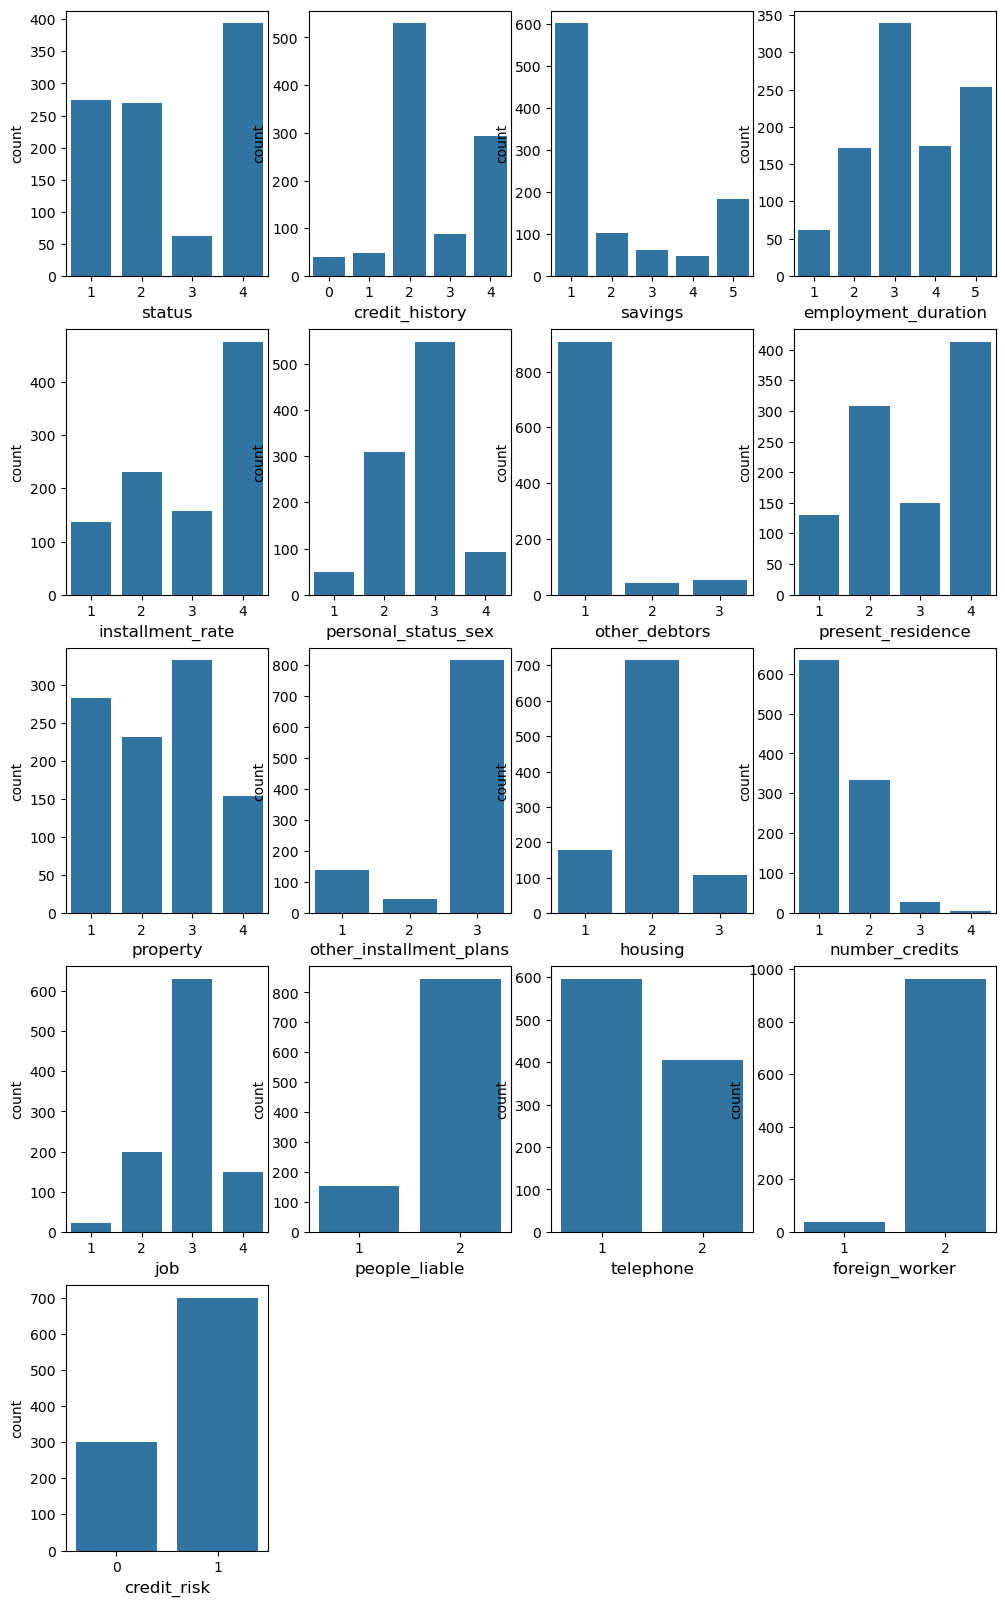

In [79]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1
plt.figure(figsize=(12,20)) 
for i in discrete_variable:
    if plotnumber <= len(discrete_variable):
        ax = plt.subplot(5,4,plotnumber)
        sns.countplot(x=i,data=data[discrete_variable])
        plt.xlabel(i,fontsize=12)
    plotnumber += 1
   
plt.show()

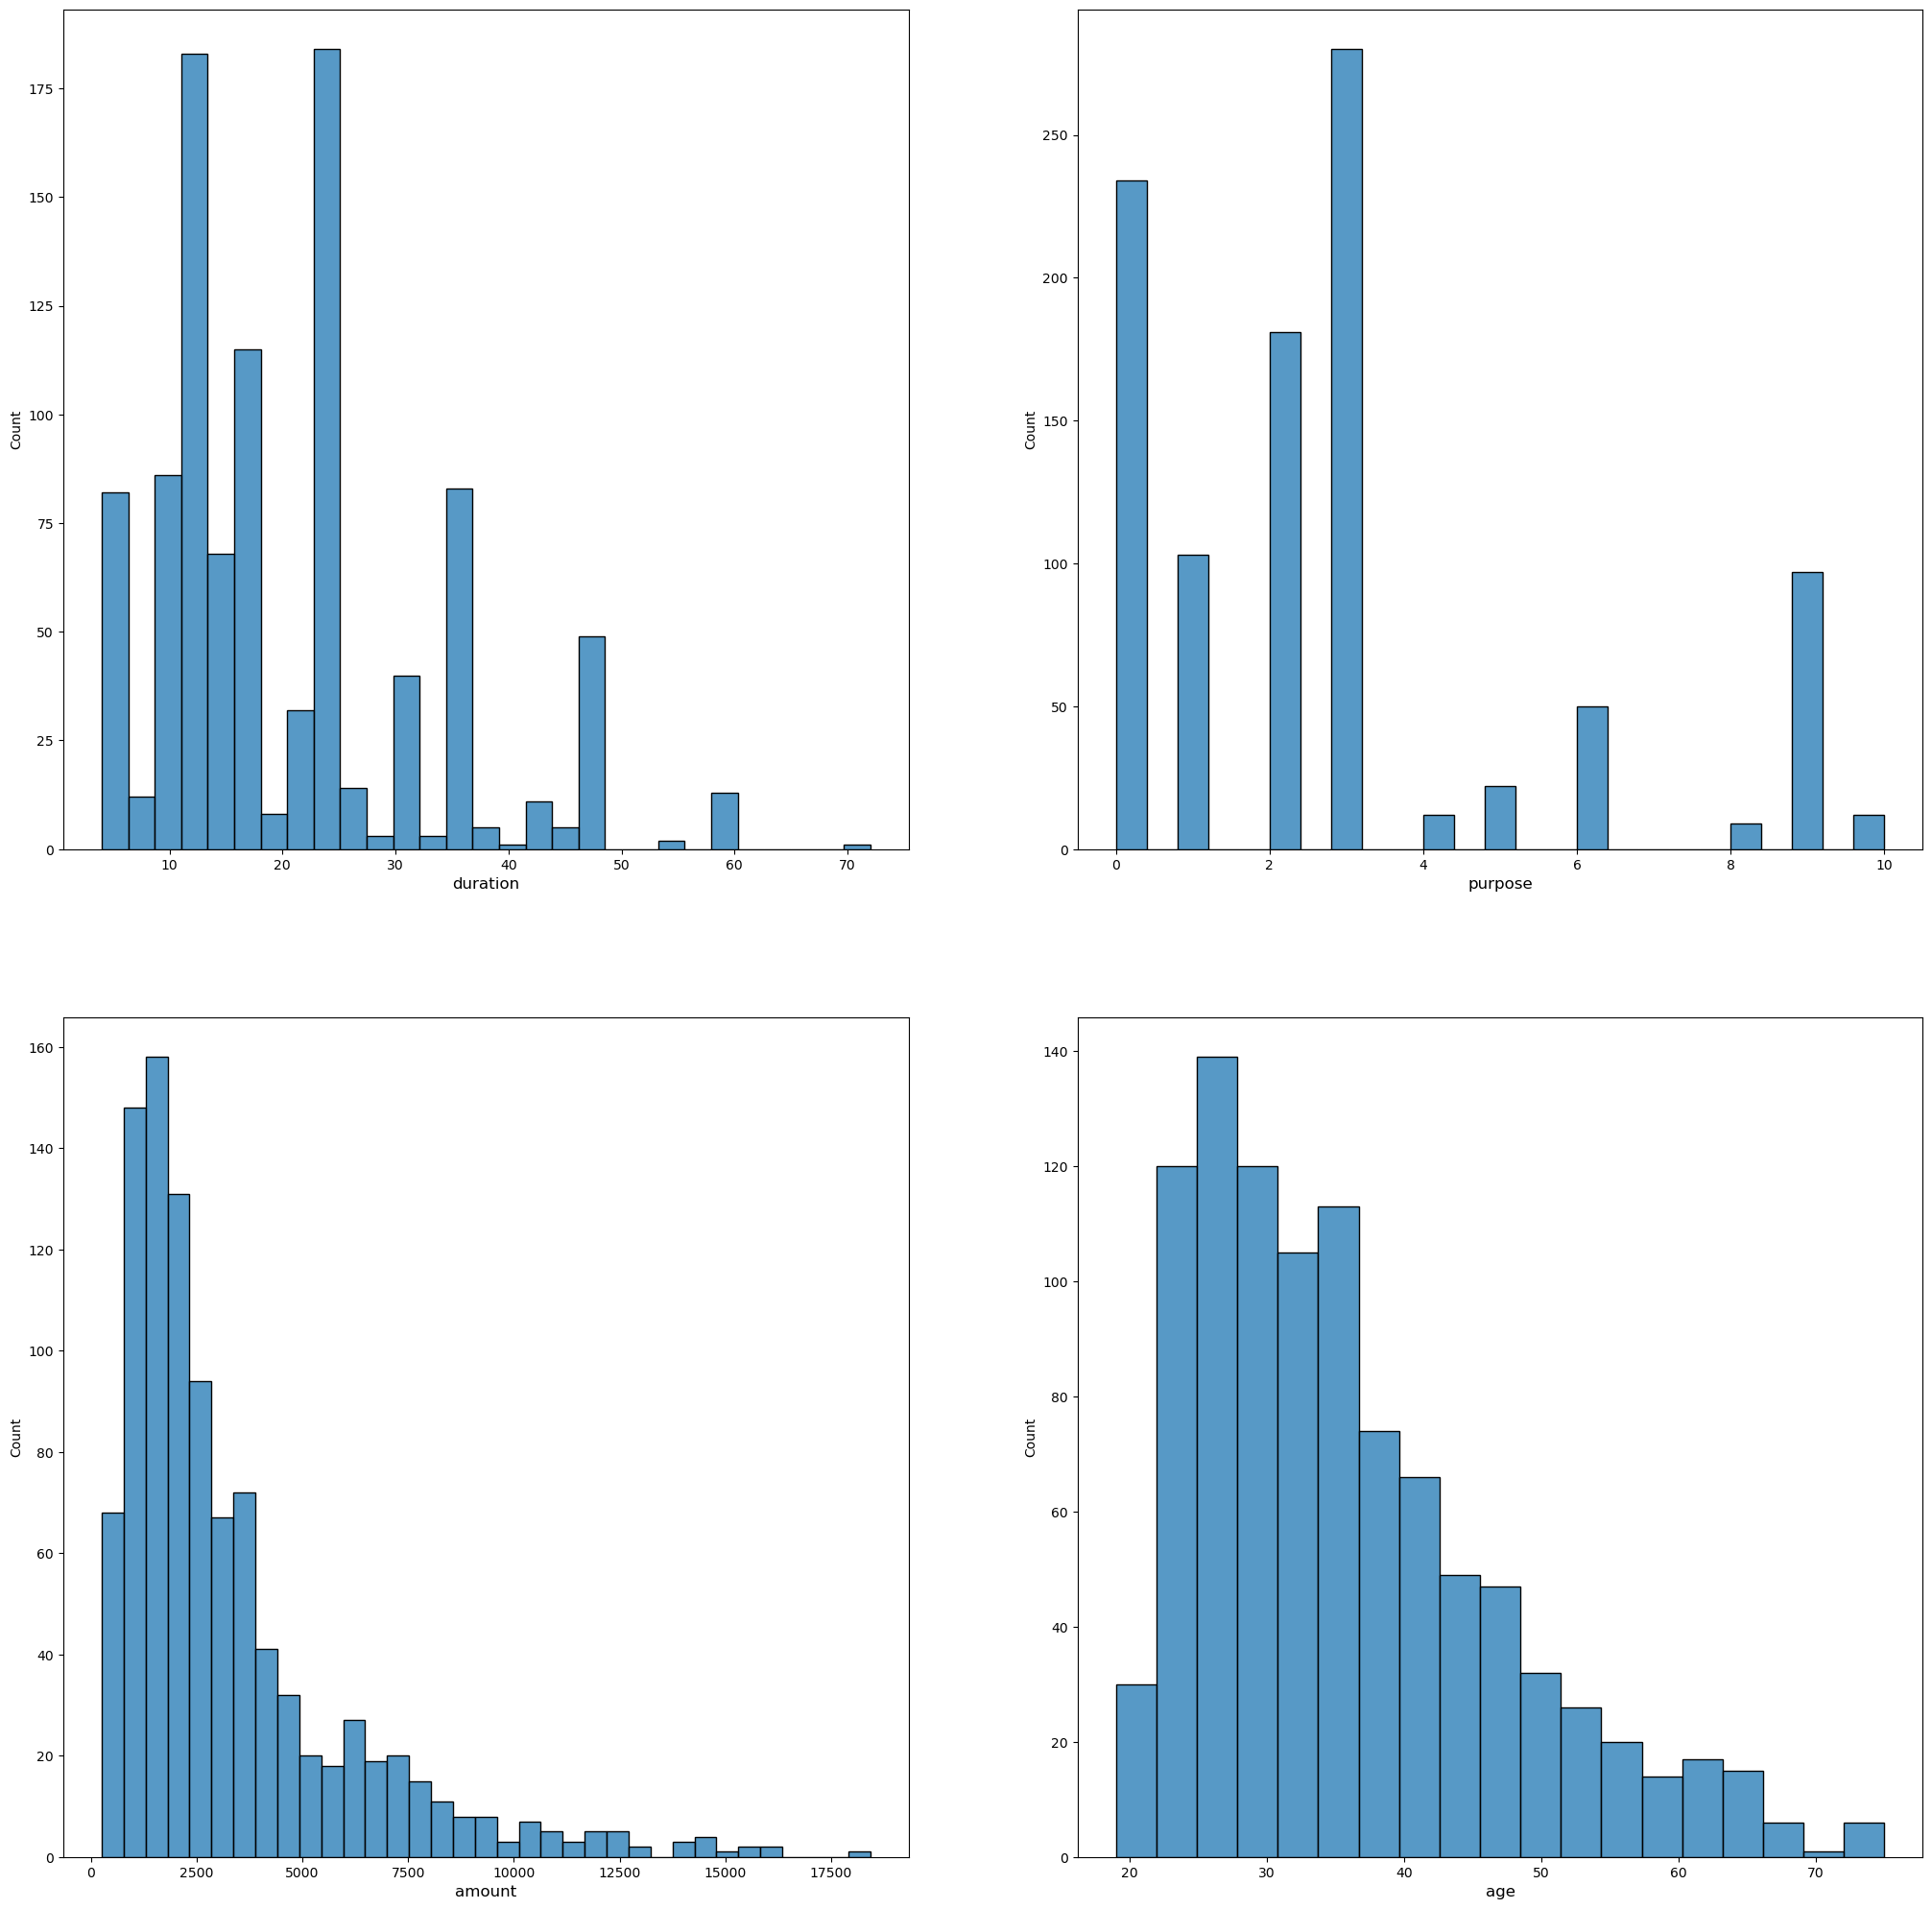

In [80]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1
for i in continous_variable:
    if plotnumber <= len(continous_variable):
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(x=i,data=data[continous_variable])
        plt.xlabel(i,fontsize=12)
    plotnumber += 1
plt.show()

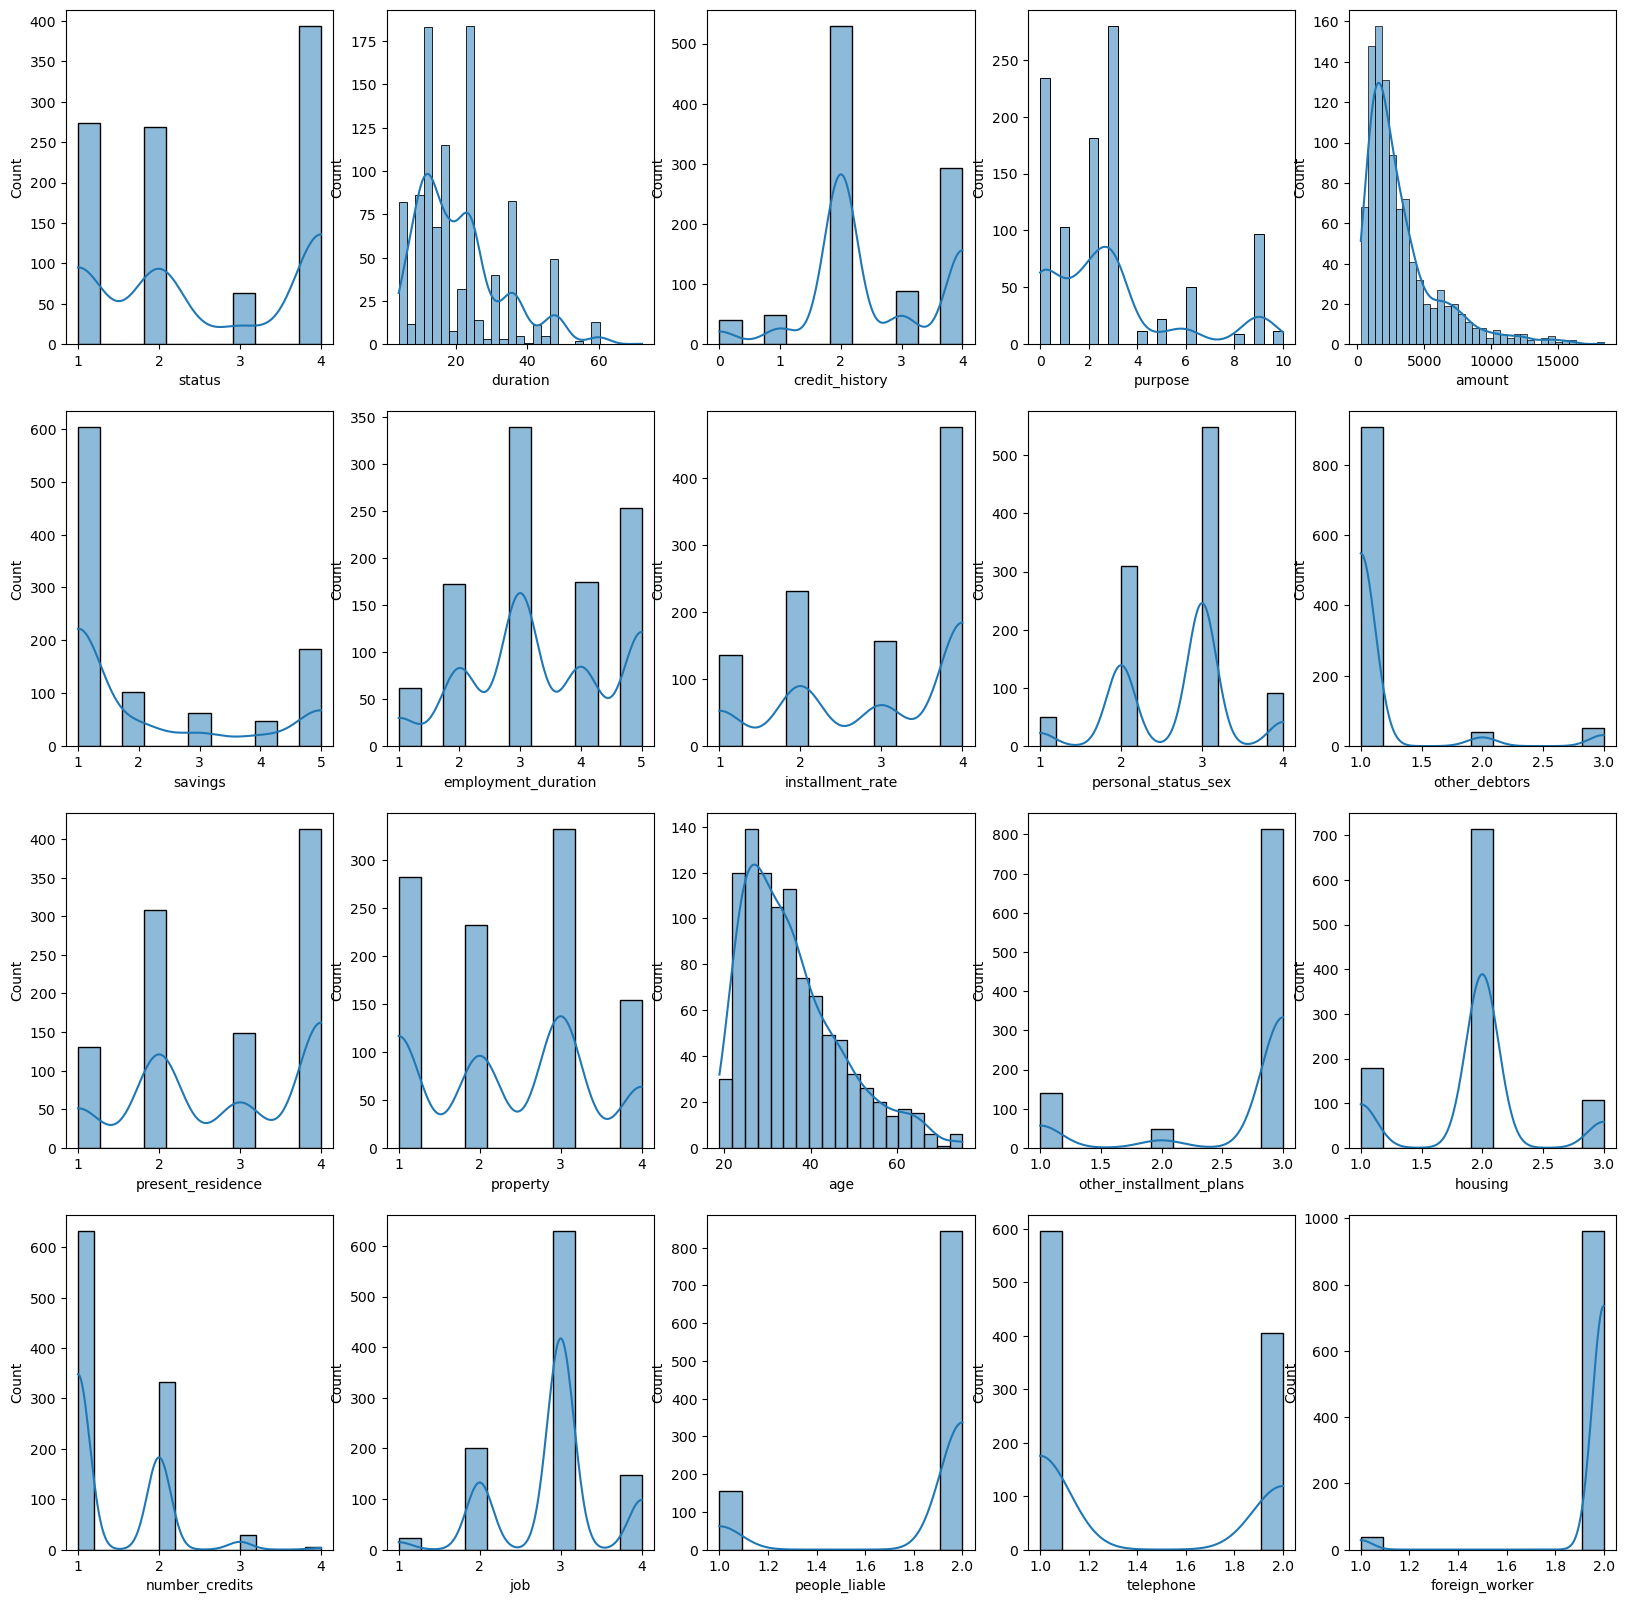

In [81]:
# We show the distribution of the variables

fig, axs=plt.subplots(4,5, figsize=(20,20))
for col, ax in zip(data.describe().columns, axs.ravel()):
  sns.histplot(x=data[col], ax=ax, kde=True)

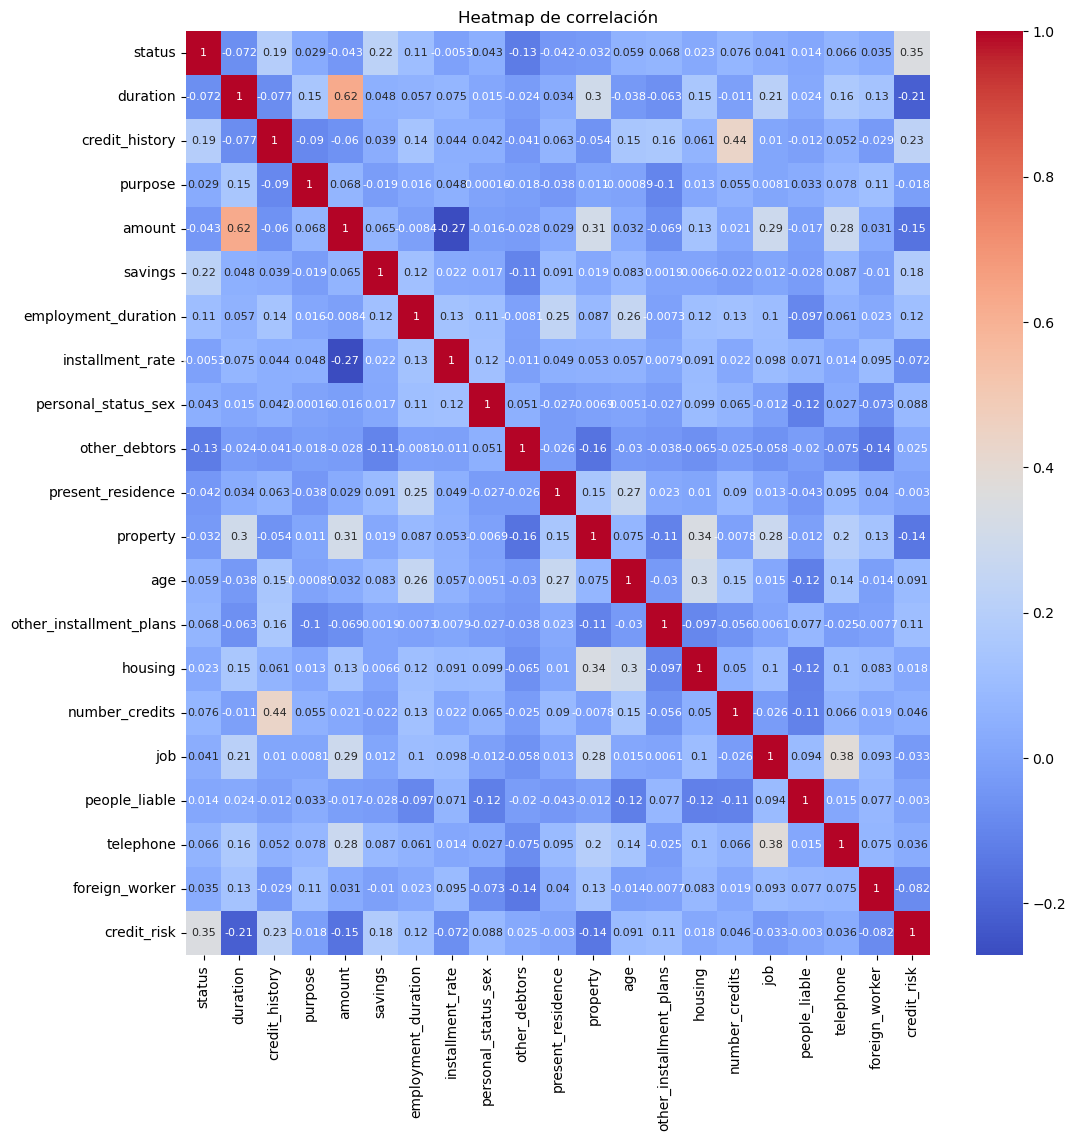

In [82]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.title("Heatmap de correlación")
plt.show()

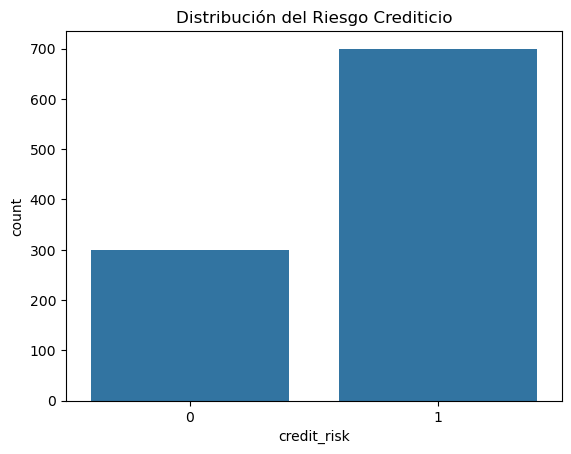

In [83]:
sns.countplot(x=data['credit_risk'])
plt.title("Distribución del Riesgo Crediticio")
plt.show()

<Axes: xlabel='credit_risk', ylabel='count'>

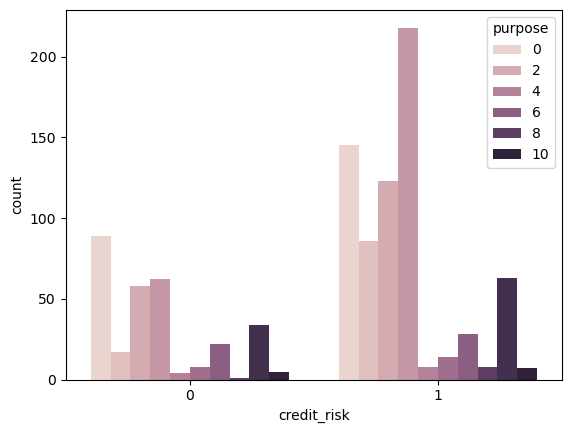

In [84]:
sns.countplot(x='credit_risk',hue='purpose',data=data)

(array([ 81., 211., 153., 123.,  91.,  79.,  46.,  32.,  19.,  30.,  27.,
         23.,  18.,  11.,   9.,   6.,   7.,   6.,   4.,   5.,   5.,   1.,
          3.,   4.,   1.,   4.,   0.,   0.,   0.,   1.]),
 array([  250. ,   855.8,  1461.6,  2067.4,  2673.2,  3279. ,  3884.8,
         4490.6,  5096.4,  5702.2,  6308. ,  6913.8,  7519.6,  8125.4,
         8731.2,  9337. ,  9942.8, 10548.6, 11154.4, 11760.2, 12366. ,
        12971.8, 13577.6, 14183.4, 14789.2, 15395. , 16000.8, 16606.6,
        17212.4, 17818.2, 18424. ]),
 <BarContainer object of 30 artists>)

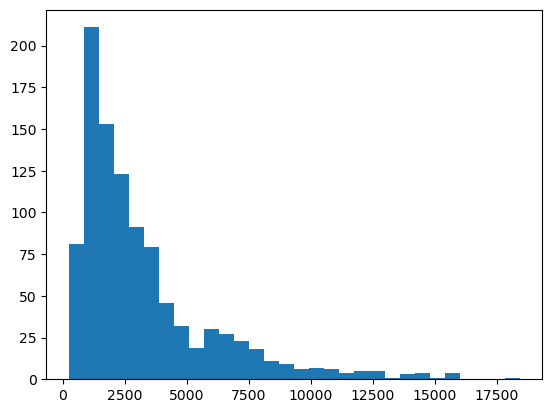

In [85]:
plt.hist(x='amount',bins=30,data=data)

In [86]:
data[data['credit_risk']==0]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
22,2,36,2,5,2384,1,2,4,3,1,1,4,33,3,1,1,2,2,1,2,0
45,1,18,2,0,1216,1,2,4,2,1,3,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,2,1,30,3,2,2,3,2,1,2,0
97,2,36,3,9,4455,1,3,2,1,1,2,1,30,2,2,2,4,2,2,2,0
110,1,15,2,0,3959,1,3,3,2,1,2,2,29,3,2,1,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,2,2,2,0


In [87]:
max(data[data['credit_risk']==0]['amount'])

18424

Text(0.5, 1.0, 'Histograma de montos de préstamos incobrables')

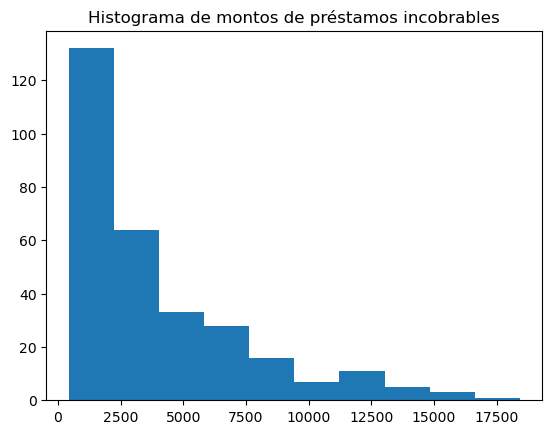

In [88]:
plt.hist(data=data[data['credit_risk']==0],x='amount')
plt.title('Histograma de montos de préstamos incobrables')

In [89]:
# We define the variables that we will use to explore the data

var_num=["duration", "amount", "age"]
var_nom=["status", "credit_history", "purpose", "savings", "personal_status_sex","housing"]
var_ord=["employment_duration", "installment_rate", "present_residence", "property", "number_credits","job"]
var_bin=["telephone", "foreign_worker", "credit_risk"]

columns_with_outliers=['duration','purpose','amount','other_debtors','age','other_installment_plans','number_credits',
        'people_liable']

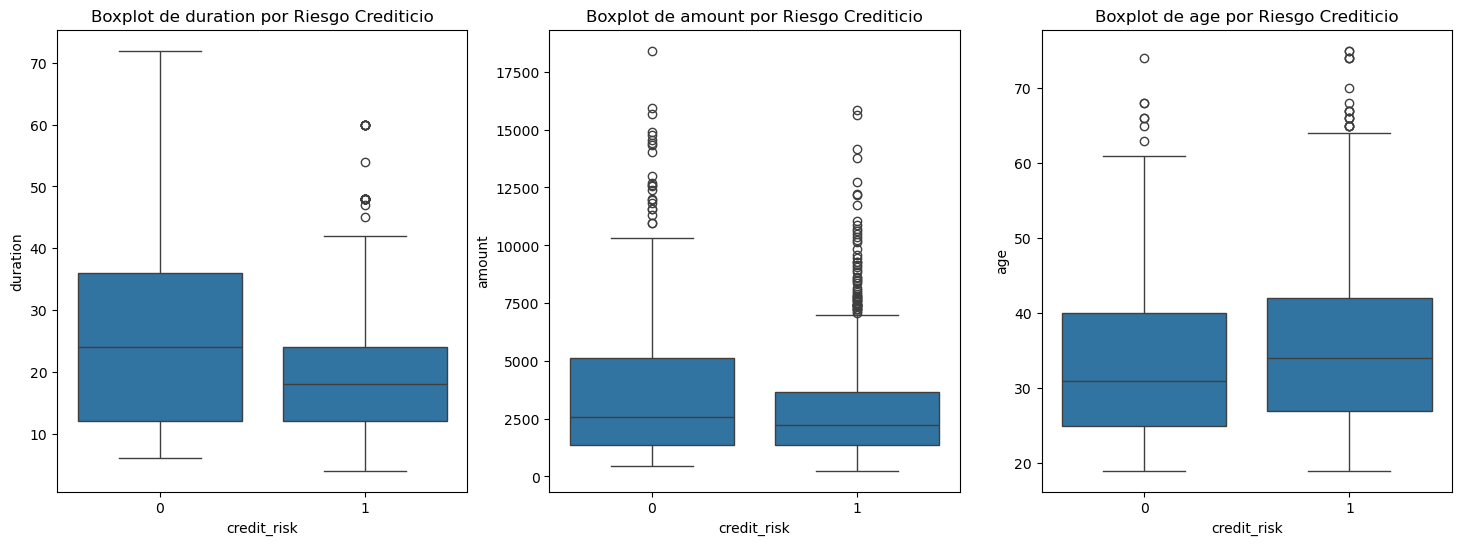

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i, col in enumerate(var_num):
    sns.boxplot(x=data['credit_risk'], y=data[col], ax=axs[i])
    axs[i].set_title(f"Boxplot de {col} por Riesgo Crediticio")
plt.show()

In [91]:

tabla_valores_atipicos = pd.DataFrame(columns = ['Columna', 'IQR', 'Atipicos', 'EliminadosP100'])
Registros_df = data.shape[0]

for col in columns_with_outliers: 
    #print(col) 
    Q1 = (data[col].dropna().quantile(0.25))
    Q3 = (data[col].dropna().quantile(0.75))
    IQR = Q3 - Q1
    valores_atipicos = ( (( data[col].dropna() < (Q1 - 1.5 * IQR)) | ( data[col].dropna() > (Q3 + 1.5 * IQR))).sum() )
    BM_Outliers = (( data[col] < (Q1 - 1.5 * IQR)) | ( data[col] > (Q3 + 1.5 * IQR)))
    elementos_eliminados = valores_atipicos/Registros_df*100

    data.drop(data[BM_Outliers].index, inplace = True)

    new_row_atipicos={'Columna':col,'IQR':IQR, 'Atipicos':valores_atipicos, 'EliminadosP100': elementos_eliminados}
    tabla_valores_atipicos.loc[len(data)]=new_row_atipicos
tabla_valores_atipicos

,Columna,IQR,Atipicos,EliminadosP100
930,duration,12.0,70,7.0
833,purpose,2.0,97,9.7
773,amount,2243.0,60,6.0
696,other_debtors,0.0,77,7.7
679,age,15.0,17,1.7
572,other_installment_plans,0.0,107,10.7
570,number_credits,1.0,2,0.2
496,people_liable,0.0,74,7.4


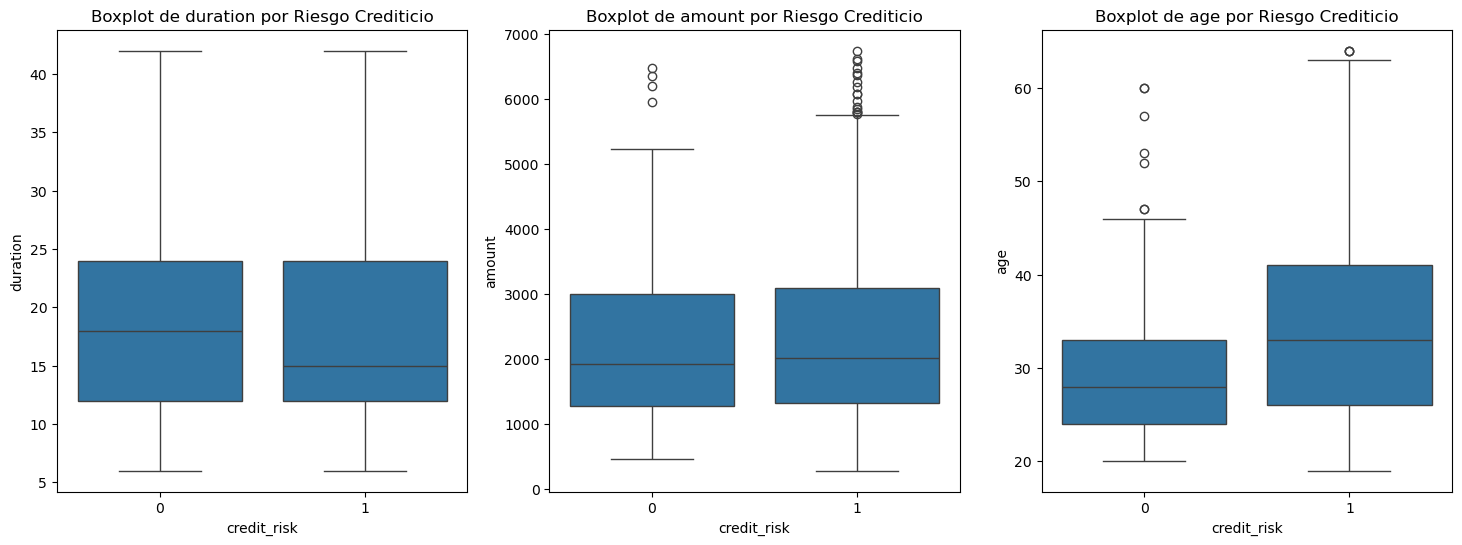

In [92]:
fig, axs = plt.subplots(1, len(var_num), figsize=(18, 6))
for i, col in enumerate(var_num):
    sns.boxplot(x=data['credit_risk'], y=data[col], ax=axs[i])
    axs[i].set_title(f"Boxplot de {col} por Riesgo Crediticio")
plt.show()

In [93]:
data.skew()

status                    -0.225644
duration                   0.706081
credit_history             0.191081
purpose                    0.444179
amount                     1.081254
savings                    0.955697
employment_duration       -0.013653
installment_rate          -0.721250
personal_status_sex       -0.039235
other_debtors              0.000000
present_residence         -0.265857
property                   0.018032
age                        0.977220
other_installment_plans    0.000000
housing                   -0.235779
number_credits             1.157358
job                       -0.516333
people_liable              0.000000
telephone                  0.535846
foreign_worker            -6.509200
credit_risk               -1.196029
dtype: float64

In [94]:
# We transform the variables that have a high skewness

col=['amount','savings','number_credits']
for i in col:
    data[i]=np.log(data[i]+1)

In [95]:
data.skew()

status                    -0.225644
duration                   0.706081
credit_history             0.191081
purpose                    0.444179
amount                    -0.245929
savings                    0.771291
employment_duration       -0.013653
installment_rate          -0.721250
personal_status_sex       -0.039235
other_debtors              0.000000
present_residence         -0.265857
property                   0.018032
age                        0.977220
other_installment_plans    0.000000
housing                   -0.235779
number_credits             0.983321
job                       -0.516333
people_liable              0.000000
telephone                  0.535846
foreign_worker            -6.509200
credit_risk               -1.196029
dtype: float64

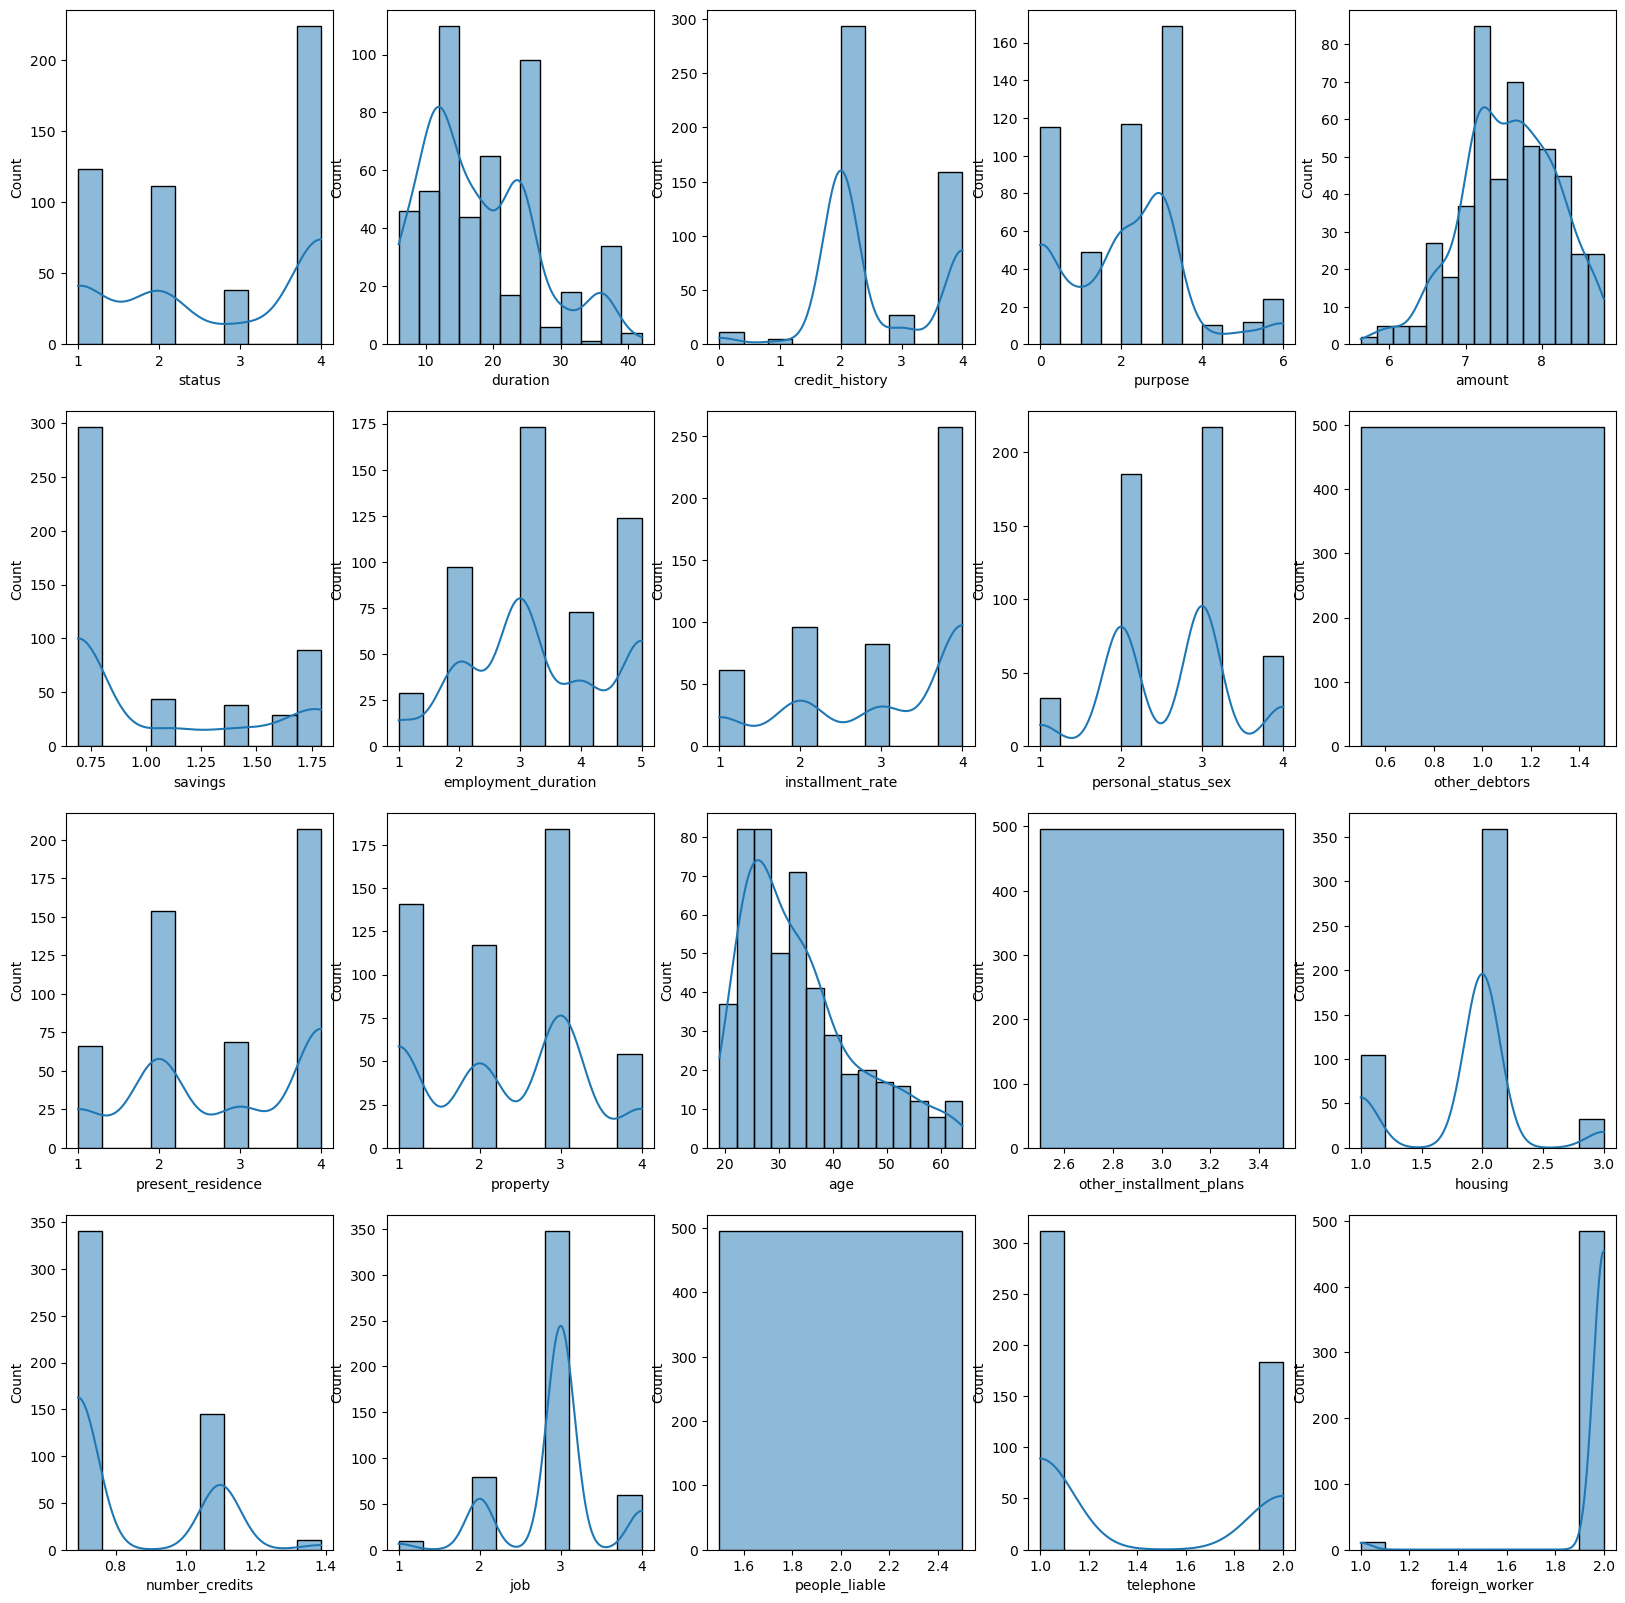

In [96]:
fig, axs=plt.subplots(4,5, figsize=(20,20))
for col, ax in zip(data.describe().columns, axs.ravel()):
  sns.histplot(x=data[col], ax=ax, kde=True)

In [97]:
del data['other_debtors']
del data['other_installment_plans']
del data['people_liable']

In [98]:
# # We define the pipelines for the numerical, ordinal and nominal variables and the names of the variables

# # Numeric variables pipeline:
# num_pipe = Pipeline(steps=[("scale", StandardScaler()),("transf", FunctionTransformer())])
# num_pipe_nombres = var_num

# # Categorical variables pipeline:
# cat_ord_pipe = Pipeline(steps=[("ordin", OrdinalEncoder())])
# cat_ord_nombres = var_ord

# # Nominal variables pipeline:
# cat_nom_pipe = Pipeline(steps=[("dummies", OneHotEncoder())])
# cat_nom_nombres = var_nom

In [99]:
# data_num_transformed = num_pipe.fit_transform(data[num_pipe_nombres])
# data_cat_ord_transformed = cat_ord_pipe.fit_transform(data[cat_ord_nombres])
# data_cat_nom_transformed = cat_nom_pipe.fit_transform(data[cat_nom_nombres])
# data_bin_transformed = data[var_bin]

# data_num_dense = data_num_transformed.toarray()
# data_cat_ord_dense = data_cat_ord_transformed.toarray()
# data_cat_nom_dense = data_cat_nom_transformed.toarray()
# data_bin_dense = data_bin_transformed.toarray() if sparse.issparse(data_bin_transformed) else data_bin_transformed

# df_num = pd.DataFrame(data_num_dense, columns=num_pipe_nombres)
# df_cat_ord = pd.DataFrame(data_cat_ord_dense, columns=cat_ord_pipe.named_steps['ordin'].get_feature_names_out(cat_ord_nombres))
# df_cat_nom = pd.DataFrame(data_cat_nom_dense, columns=cat_nom_pipe.named_steps['dummies'].get_feature_names_out(cat_nom_nombres))
# df_bin = pd.DataFrame(data_bin_dense, columns=var_bin)

# df_transformed = pd.concat([df_num, df_cat_ord, df_cat_nom, df_bin], axis=1)


In [100]:
scaling = [feature for feature in data.columns if feature not in ['credit_risk']]

scaler = StandardScaler()
scaler.fit(data[scaling])

scaler.transform(data[scaling])

data2=pd.DataFrame(scaler.transform(data[scaling]),columns=data[scaling].columns)
final=pd.concat([data[['credit_risk']].reset_index(drop=True),data2],axis=1)
final.head()


,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,housing,number_credits,job,telephone,foreign_worker
0,1,-1.371108,0.034399,1.342566,-0.054294,-1.005360,-0.756735,-1.102849,0.841989,-0.786458,1.043286,-0.304734,-1.218765,-1.694438,-0.660978,0.126588,-0.767948,0.150600
1,1,-1.371108,-1.158739,1.342566,-1.336676,0.896266,-0.756735,0.549759,-1.899542,0.488324,1.043286,-1.305713,0.472428,0.283071,1.361569,-1.570381,-0.767948,-6.640099
2,1,-0.579409,0.750282,-0.633436,0.586896,1.059236,0.787013,-1.929154,-1.899542,-0.786458,1.043286,1.697224,-1.030855,-1.694438,-0.660978,-3.267350,-0.767948,0.150600
3,1,-1.371108,1.466165,1.342566,-0.695485,1.866157,0.146300,0.549759,-1.899542,1.763106,1.043286,0.696245,-0.936900,-1.694438,1.361569,0.126588,-0.767948,0.150600
4,1,-1.371108,-1.397367,1.342566,0.586896,0.003387,-0.756735,0.549759,-1.899542,-0.786458,1.043286,0.696245,-0.279213,0.283071,-0.660978,0.126588,-0.767948,0.150600


In [101]:
with open(r'../../params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
    
print(config['data_load']['dataset_csv'])

../data/Preprocess.csv


In [102]:
data.to_csv(config['data_load']['dataToModel'], index=False)

In [103]:
file = 'Scaler_Credit_Data.pkl'

pickle.dump(scaler,open(file,'wb'))